<a href="https://colab.research.google.com/github/Hero0963/data_science_camp_level2/blob/main/task08/dscamp_lv2_task08_hw_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#練習：請根據給定的資料集，利用 K-means 進行分群，請比較看看 k = 3、4、5 哪一種可能比較好？為什麼？

In [ ]:
import numpy as np
import pandas as pd

X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

print('===== 原始資料 =====')
df = pd.DataFrame(X)
display(df)

===== 原始資料 =====


,0,1
0,1,2
1,1,4
2,1,0
3,4,2
4,4,4
5,4,0


In [ ]:
from sklearn.cluster import KMeans

s = []
head, tail = 3, 5
for k in range(head, tail + 1):
    km = KMeans(n_clusters=k)
    km.fit(df)
    s.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

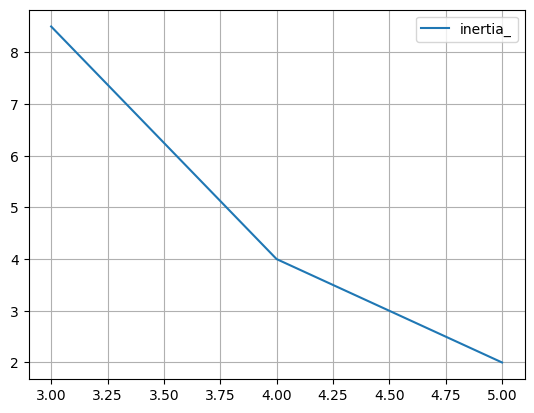

In [ ]:
df_kmeans = pd.DataFrame()
df_kmeans['inertia_'] = s
df_kmeans.index = list(range(head, tail + 1))
df_kmeans.plot(grid=True)

# **回答**
我們觀察 inertia_ 值和 K 值的關係圖，尋找曲線上的"彎曲點"（類似Elbow方法），選取彎曲點對應的K值作為最佳聚類數量。

inertia_可以用來評估K-means聚類結果的好壞。inertia_是K-means算法的一個屬性，表示每個樣本到其最近聚類中心的距離的平方和。

在K-means算法中，目標是將樣本分配到聚類中心，使得每個樣本到其所屬聚類中心的距離最小。因此，較小的inertia_值表示樣本更接近其所屬的聚類中心，聚類結果更好。

最終選取 **K = 4**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


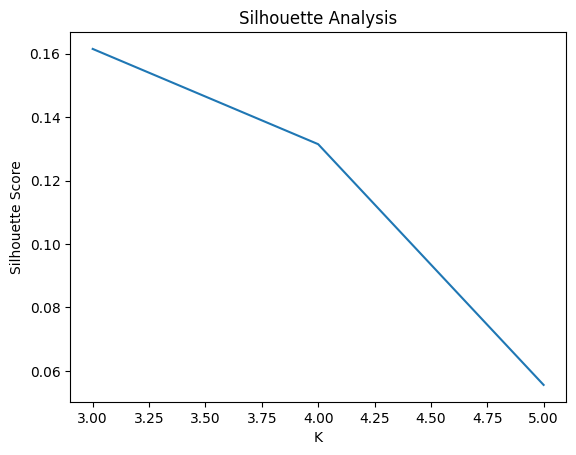

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
head, tail = 3, 5
k_values = range(head, tail + 1)  # 測試的K值範圍
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# 繪製K值和平均silhouette係數的折線圖
plt.plot(k_values, silhouette_scores)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# **回答**

Silhouette分析是一種用於評估聚類結果的方法，旨在量化聚類的有效性和一致性。該分析方法基於每個樣本的"silhouette coefficient"（輪廓係數），該係數衡量了樣本與其分配的聚類之間的相似性和差異性。

Silhouette係數的計算方式如下：

對於每個樣本，計算它與同一聚類中所有其他樣本的平均距離，稱為a（平均內部距離）。
對於每個樣本，計算它與最近的不同聚類中所有其他樣本的平均距離，稱為b（平均間隔距離）。
樣本的silhouette係數計算為（b - a）/ max(a, b)。
該係數的值範圍在-1到1之間，具有以下含義：

接近1：樣本與其所屬聚類之間的距離相對較小，與其他聚類之間的距離相對較大，表示該樣本被正確分配到聚類中。
接近-1：樣本與其所屬聚類之間的距離相對較大，與其他聚類之間的距離相對較小，表示該樣本可能被錯誤地分配到了聚類中。
接近0：樣本與其所屬聚類和其他聚類之間的距離相似，表示該樣本在聚類中的位置不明確。
透過對所有樣本計算silhouette係數，可以得到整體聚類的silhouette係數，作為評估聚類結果的指標。通常，較高的silhouette係數表示聚類結果較好，聚類內部的相似性較高，聚類之間的差異性較大。


我們選取 **K = 3**。